<a href="https://colab.research.google.com/github/cebisilerhmchunu-max/OIBSIP/blob/main/Customer_Segmentation_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('ifood_df.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (2205, 39)

First few rows:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Wi

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Identify constant columns
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f"\nConstant Columns: {constant_cols}")

# Remove constant columns (like Z_CostContact and Z_Revenue)
df_clean = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# Check data types and unique values
print("\nCategorical Columns:")
categorical_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                   'AcceptedCmp5', 'Complain', 'Response', 'marital_Divorced',
                   'marital_Married', 'marital_Single', 'marital_Together',
                   'marital_Widow', 'education_2n Cycle', 'education_Basic',
                   'education_Graduation', 'education_Master', 'education_PhD']

for col in categorical_cols:
    print(f"{col}: {df_clean[col].unique()}")

Missing Values:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds       

In [ ]:
# Key metrics calculation
print("="*60)
print("KEY CUSTOMER BEHAVIOR METRICS")
print("="*60)

# Calculate total spending by category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                 'MntSweetProducts', 'MntGoldProds']
total_spending = df_clean[spending_cols].sum()
total_customers = len(df_clean)

print(f"Total Customers: {total_customers}")
print(f"Average Customer Spending:")
for col in spending_cols:
    print(f"  {col}: ${df_clean[col].mean():.2f}")

# Calculate purchase frequency metrics
print(f"\nAverage Number of Purchases:")
print(f"  Total Purchases: {df_clean['NumDealsPurchases'].mean() + df_clean['NumWebPurchases'].mean() + df_clean['NumCatalogPurchases'].mean() + df_clean['NumStorePurchases'].mean():.2f}")
print(f"  Web Purchases: {df_clean['NumWebPurchases'].mean():.2f}")
print(f"  Store Purchases: {df_clean['NumStorePurchases'].mean():.2f}")
print(f"  Catalog Purchases: {df_clean['NumCatalogPurchases'].mean():.2f}")

# Customer demographics
print(f"\nCustomer Demographics:")
print(f"  Average Age: {df_clean['Age'].mean():.1f} years")
print(f"  Average Income: ${df_clean['Income'].mean():,.0f}")
print(f"  Customers with Kids: {(df_clean['Kidhome'] > 0).sum()} ({((df_clean['Kidhome'] > 0).sum()/total_customers*100):.1f}%)")
print(f"  Customers with Teens: {(df_clean['Teenhome'] > 0).sum()} ({((df_clean['Teenhome'] > 0).sum()/total_customers*100):.1f}%)")

# Campaign response rates
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for col in campaign_cols:
    response_rate = df_clean[col].mean() * 100
    print(f"  {col} Response Rate: {response_rate:.1f}%")

KEY CUSTOMER BEHAVIOR METRICS
Total Customers: 2205
Average Customer Spending:
  MntWines: $306.16
  MntFruits: $26.40
  MntMeatProducts: $165.31
  MntFishProducts: $37.76
  MntSweetProducts: $27.13
  MntGoldProds: $44.06

Average Number of Purchases:
  Total Purchases: 14.89
  Web Purchases: 4.10
  Store Purchases: 5.82
  Catalog Purchases: 2.65

Customer Demographics:
  Average Age: 51.1 years
  Average Income: $51,622
  Customers with Kids: 929 (42.1%)
  Customers with Teens: 1066 (48.3%)
  AcceptedCmp1 Response Rate: 6.4%
  AcceptedCmp2 Response Rate: 1.4%
  AcceptedCmp3 Response Rate: 7.4%
  AcceptedCmp4 Response Rate: 7.4%
  AcceptedCmp5 Response Rate: 7.3%


In [ ]:
# Create RFM features (Recency, Frequency, Monetary)
df_seg = df_clean.copy()

# Monetary: Total spending
df_seg['Total_Spent'] = df_seg[['MntWines', 'MntFruits', 'MntMeatProducts',
                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Frequency: Total number of purchases
df_seg['Total_Purchases'] = df_seg[['NumDealsPurchases', 'NumWebPurchases',
                                     'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Recency: Days since last purchase (higher recency = longer since last purchase)
df_seg['Recency'] = df_seg['Recency']

# Engagement metrics
df_seg['Web_Engagement'] = df_seg['NumWebVisitsMonth']
df_seg['Campaign_Response'] = df_seg[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                                       'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

# Family status
df_seg['Family_Size'] = df_seg['Kidhome'] + df_seg['Teenhome'] + 1

# Select features for clustering
segmentation_features = [
    'Income',
    'Total_Spent',
    'Total_Purchases',
    'Recency',
    'Web_Engagement',
    'Campaign_Response',
    'Family_Size',
    'Age'
]

df_segmentation = df_seg[segmentation_features]

# Handle any missing values
df_segmentation = df_segmentation.dropna()

print("Segmentation Dataset Shape:", df_segmentation.shape)

Segmentation Dataset Shape: (2205, 8)


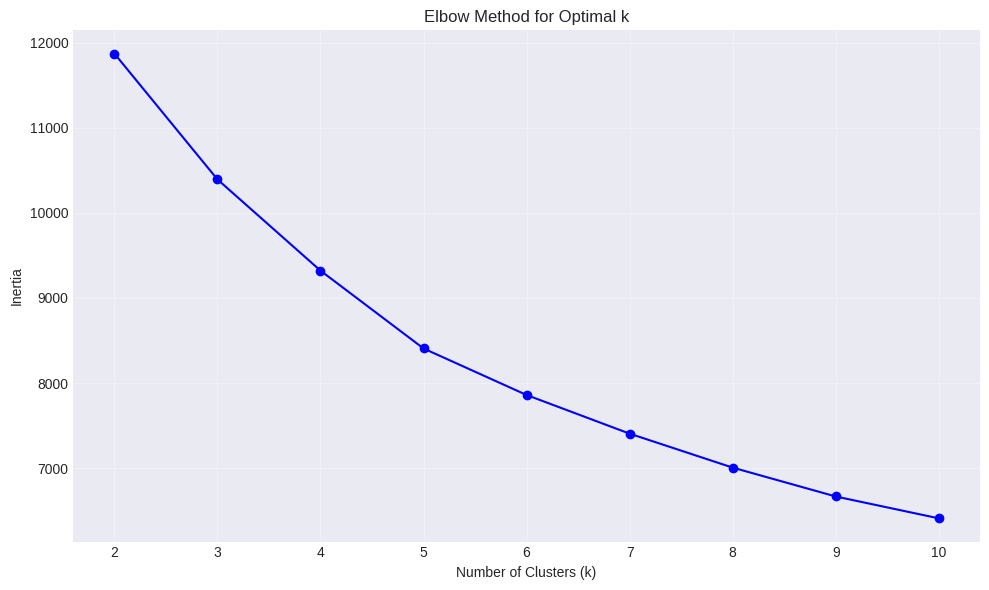

In [ ]:
# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_segmentation),
                         columns=df_segmentation.columns)

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Based on elbow plot, choose optimal k (typically 4-5)
optimal_k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_segmentation['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_seg['Cluster'] = df_segmentation['Cluster']

# Analyze cluster characteristics
cluster_summary = df_seg.groupby('Cluster')[segmentation_features].mean()
cluster_summary['Count'] = df_seg['Cluster'].value_counts().sort_index()
cluster_summary['Percentage'] = (cluster_summary['Count'] / len(df_seg) * 100).round(1)

print("\n" + "="*60)
print("CLUSTER CHARACTERISTICS SUMMARY")
print("="*60)
print(cluster_summary.round(2))


CLUSTER CHARACTERISTICS SUMMARY
           Income  Total_Spent  Total_Purchases  Recency  Web_Engagement  \
Cluster                                                                    
0        67021.50      1035.35            21.54    49.01            4.04   
1        30335.62       121.22             8.28    48.09            6.93   
2        44238.07       199.17            11.32    49.54            6.11   
3        79963.59      1586.11            20.80    50.31            3.16   

         Campaign_Response  Family_Size    Age  Count  Percentage  
Cluster                                                            
0                     0.14         1.66  54.18    748        33.9  
1                     0.09         1.84  42.81    656        29.8  
2                     0.11         2.78  56.88    567        25.7  
3                     1.84         1.18  50.44    234        10.6  


<Figure size 1200x1000 with 0 Axes>

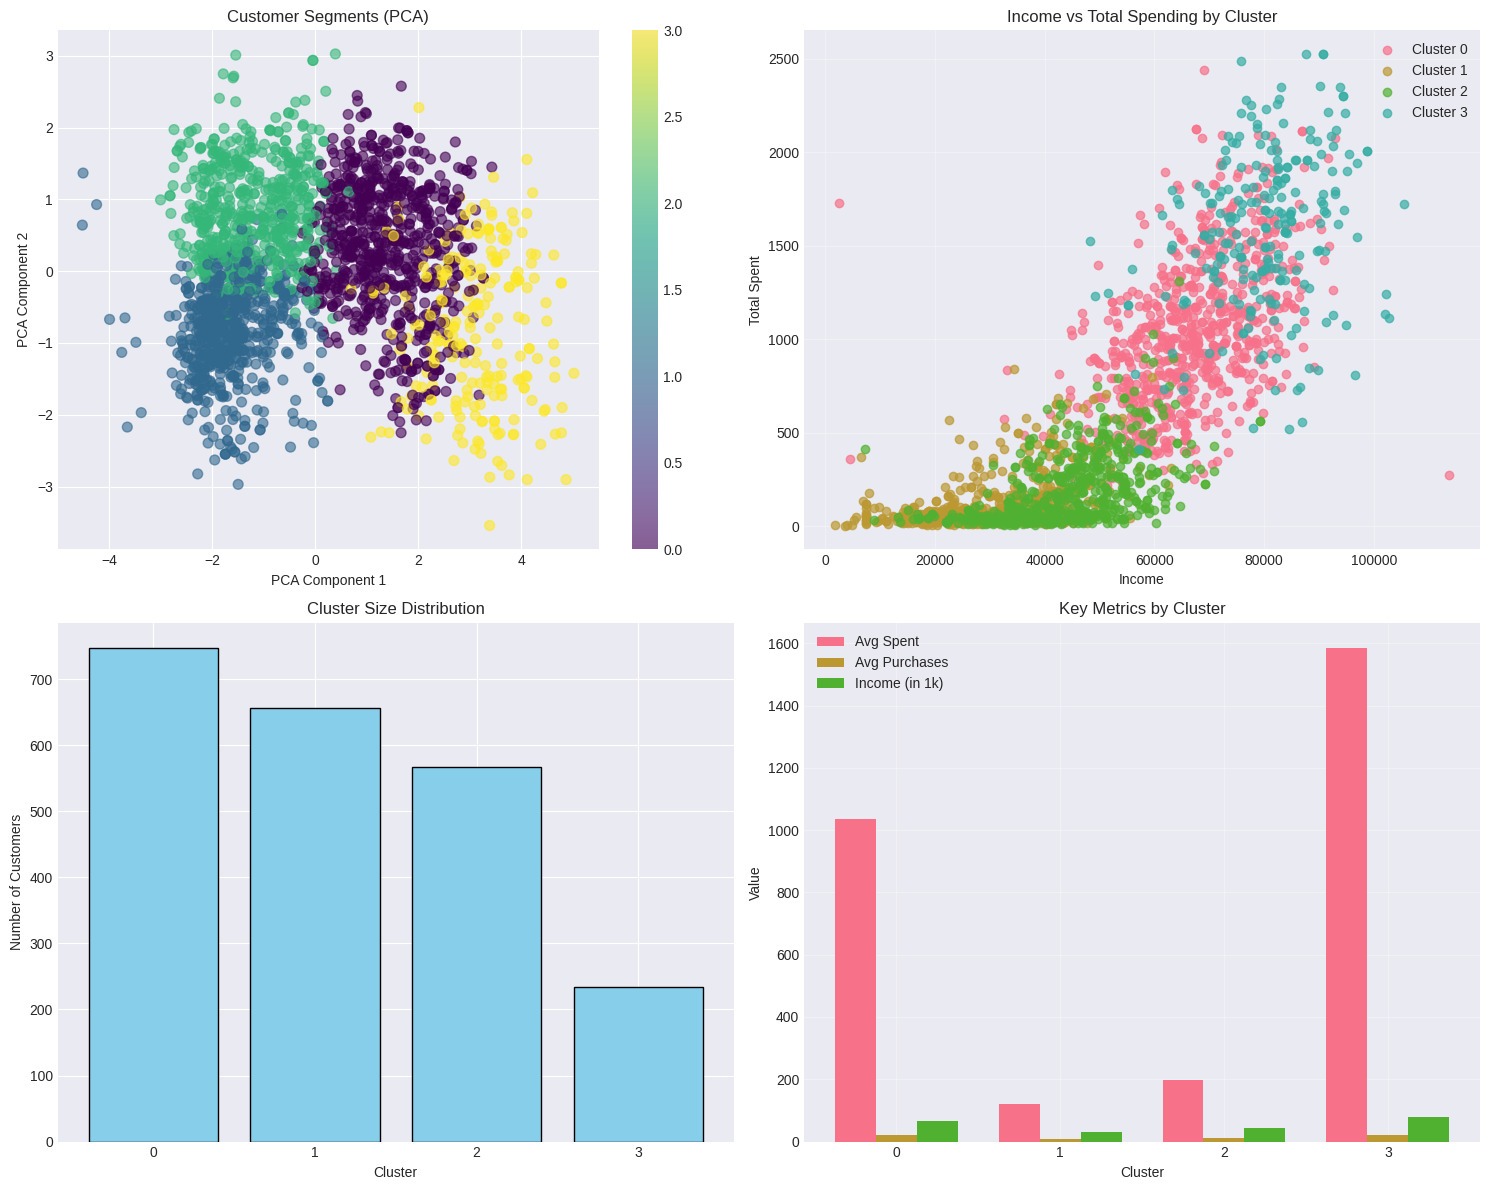

In [ ]:
# Visualization 1: PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 10))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. PCA Scatter Plot
scatter = axes[0, 0].scatter(pca_result[:, 0], pca_result[:, 1],
                              c=df_segmentation['Cluster'], cmap='viridis',
                              alpha=0.6, s=50)
axes[0, 0].set_xlabel('PCA Component 1')
axes[0, 0].set_ylabel('PCA Component 2')
axes[0, 0].set_title('Customer Segments (PCA)')
plt.colorbar(scatter, ax=axes[0, 0])

# 2. Income vs Total Spent by Cluster
for cluster in range(optimal_k):
    cluster_data = df_seg[df_seg['Cluster'] == cluster]
    axes[0, 1].scatter(cluster_data['Income'], cluster_data['Total_Spent'],
                       label=f'Cluster {cluster}', alpha=0.7)
axes[0, 1].set_xlabel('Income')
axes[0, 1].set_ylabel('Total Spent')
axes[0, 1].set_title('Income vs Total Spending by Cluster')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cluster Size Distribution
cluster_counts = df_seg['Cluster'].value_counts().sort_index()
axes[1, 0].bar(range(optimal_k), cluster_counts.values, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Number of Customers')
axes[1, 0].set_title('Cluster Size Distribution')
axes[1, 0].set_xticks(range(optimal_k))

# 4. Average Metrics by Cluster
cluster_means = df_seg.groupby('Cluster')[['Total_Spent', 'Total_Purchases', 'Income']].mean()
x = np.arange(optimal_k)
width = 0.25
axes[1, 1].bar(x - width, cluster_means['Total_Spent'], width, label='Avg Spent')
axes[1, 1].bar(x, cluster_means['Total_Purchases'], width, label='Avg Purchases')
axes[1, 1].bar(x + width, cluster_means['Income']/1000, width, label='Income (in 1k)')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('Key Metrics by Cluster')
axes[1, 1].set_xticks(x)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()